# Dog and Cats image classefire 

In this set we have lots of images of Dog and Cats

The Main goal is to train a model that can clasefy an image and predictt if it a Dog or Cat

The data contains  color images in different sizes  

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Preprocssesing

first we check if in the Dataset we have corrupted images

In [ ]:
from os import listdir
import pathlib
import cv2

ca =  'PetImages/cat/'
for filename in listdir(dir_for_check):
    if filename.endswith(".jpg"):
        print(dir_for_check+filename)
        cv2.imread(dir_for_check+filename)

In [ ]:
from pathlib import Path
import imghdr


cat_check = pathlib.Path('inputs/PetImages/cat')
dog_check = pathlib.Path('inputs/PetImages/cat/')
image_extensions = [".png", ".jpg"]  

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(dog_check).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            # remove corrupt image
            os.remove(filepath)
            print(f"{filepath} was removed")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [ ]:
import glob

img_paths = glob.glob(os.path.join('C:/inputs/PetImages','*/*.*'))

bad_paths = []

for image in img_paths:
    try:
        img_bytes = tf.io.read_file(image)
        decoded_img = tf.io.decode_image(img_bytes)
    except tf.errors.InvalidArgumentError as e:
        print(f"Found bad path {image_path}...{e}")
        bad_paths.append(image)

    print(f"{image}: OK")

print("BAD PATHS:")
for bad_path in bad_paths:
    print(f"{bad_path}")
    os.remove(bad_path)
    print(f"{bad_path} was removed")


In [2]:
dir_path ='/inputs/PetImages'

### Uploading the full data set

In [3]:
batch_size = 32
# we will resize the images into 128*128 px over 3 layers (rgb)
img_height = 128
img_width = 128

total_ds = tf.keras.utils.image_dataset_from_directory(
    dir_path,
    color_mode= 'rgb',
    labels="inferred",
    label_mode="int",
    image_size = (img_height, img_width),
    shuffle=True,
    batch_size=None

                
)

Found 24970 files belonging to 2 classes.


In [4]:
total_size = len(total_ds)

In [ ]:
# counting images by class and check if balanced


i=0
cat = 0
dog = 0
for images, labels in total_ds.take(len(total_ds)):
    print(total_ds.class_names[labels], i)
    if total_ds.class_names[labels] == 'Cat':
        cat += 1
    if total_ds.class_names[labels] == 'Dog':
        dog += 1
    i+=1
print (cat , dog)

<BarContainer object of 2 artists>

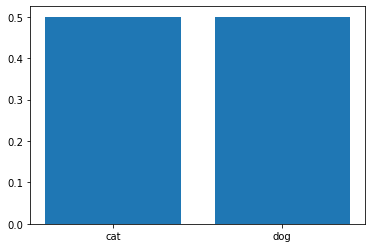

In [6]:
plt.bar(['cat' , 'dog'],[cat/total_size,dog/total_size])

# Spliting into Train Validation and Test

In [7]:
train_size = int(0.7*total_size)
validation_size = int(0.1*total_size)
test_size = int(0.2*total_size)

train_data = total_ds.take(train_size)
val_data = total_ds.skip(train_size).take(validation_size)
test_data = total_ds.skip(train_size).skip(validation_size)

print("Train Sample: ", len(train_data), "Validation Sample: ",len(val_data), "Test Sample: ", len(test_data))
print("The proportion are :Train Sample: ", len(train_data)/total_size, "Validation Sample: ",len(val_data)/total_size, "Test Sample: ", len(test_data)/total_size)

Train Sample:  17479 Validation Sample:  2497 Test Sample:  4994
The proportion are :Train Sample:  0.7 Validation Sample:  0.1 Test Sample:  0.2


In [ ]:
sets = [train_data, val_data,test_data]
i=0
cat = 0
dog = 0
counter = []
for sets in sets:
    print("Counting set")
    for images, labels in sets.take(len(sets)):
        print(total_ds.class_names[labels], i)
        if total_ds.class_names[labels] == 'Cat':
            cat += 1
        if total_ds.class_names[labels] == 'Dog':
            dog += 1
        i+=1
    counter.append(cat)
    counter.append(dog)
    i=0
    cat = 0
    dog = 0

print (cat , dog)

In [9]:
print("TrainSample Total Size: " ,len(train_data), "#cats: ", counter[0], "#dogs: ", counter[1] ,"The proportion are: ", counter[0]/len(train_data) , counter[1]/len(train_data)  )
print("ValidtionSample Total Size: " ,len(val_data), "#cats: ", counter[2], "#dogs: ", counter[3] ,"The proportion are: ", counter[2]/len(val_data) , counter[3]/len(val_data)  )
print("TestSample Total Size: " ,len(test_data), "#cats: ", counter[4], "#dogs: ", counter[5] ,"The proportion are: ", counter[4]/len(test_data) , counter[5]/len(test_data)  )

TrainSample Total Size:  17479 #cats:  8688 #dogs:  8791 The proportion are:  0.4970536071857658 0.5029463928142343
ValidtionSample Total Size:  2497 #cats:  1258 #dogs:  1239 The proportion are:  0.5038045654785743 0.4961954345214257
TestSample Total Size:  4994 #cats:  2532 #dogs:  2462 The proportion are:  0.5070084100921105 0.4929915899078895


The image are balnce in each of thr sets

In [99]:
train_data_batch = train_data.batch(32)
val_data_batch = val_data.batch(32)
test_data_batch = test_data.batch(32)
train_data_batch

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Show some pics

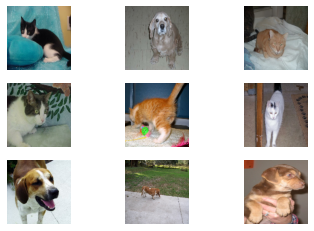

In [92]:
for i in range(9):
    for images in val_data.take(1):

        img = np.array(images[0])
        img = img.astype('uint8')
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        #plt.title(class_names[labels[i]])
        plt.axis("off")

# Build the model

In [106]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1./255, input_shape=(128,128,3)),
    
     
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax' )
])

model.compile(
    optimizer='Adam',
    loss='SparseCategoricalCrossentropy',
    metrics='accuracy',
)

model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

## Fiting the model

In [116]:
EPOCHS = 20
BATCH_SIZE = None

model.fit(
    train_data_batch,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3),
    validation_data=val_data_batch,
    initial_epoch=11,
)

Epoch 12/20
547/547 [==============================] - 472s 861ms/step - loss: 0.2745 - accuracy: 0.8819 - val_loss: 0.3682 - val_accuracy: 0.8430
Epoch 13/20
547/547 [==============================] - 469s 857ms/step - loss: 0.2502 - accuracy: 0.8948 - val_loss: 0.3279 - val_accuracy: 0.8622
Epoch 14/20
547/547 [==============================] - 465s 849ms/step - loss: 0.2226 - accuracy: 0.9105 - val_loss: 0.3242 - val_accuracy: 0.8775
Epoch 15/20
547/547 [==============================] - 465s 850ms/step - loss: 0.1936 - accuracy: 0.9229 - val_loss: 0.3222 - val_accuracy: 0.8714
Epoch 16/20
547/547 [==============================] - 464s 847ms/step - loss: 0.1619 - accuracy: 0.9364 - val_loss: 0.3193 - val_accuracy: 0.8767
Epoch 17/20
547/547 [==============================] - 470s 858ms/step - loss: 0.1604 - accuracy: 0.9396 - val_loss: 0.3233 - val_accuracy: 0.8767
Epoch 18/20
547/547 [==============================] - 466s 851ms/step - loss: 0.1336 - accuracy: 0.9467 - val_loss: 0

In [117]:
model.evaluate(test_data_batch, verbose=1)

157/157 [==============================] - 77s 401ms/step - loss: 0.4416 - accuracy: 0.8372


[0.4415699243545532, 0.83720463514328]

###### 83 percent accuracy, not perfect, but at this point it satisfies me

In [153]:
## make some prediction

def make_predict(predict_path):
    img_file = tf.keras.utils.load_img(predict_path, target_size=(128,128))
    input_arr = tf.keras.utils.img_to_array(img_file)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    prediction = model.predict(input_arr)
    cat_p = prediction[0][0]
    dog_p = prediction[0][1]
    plt.imshow(img_file)
    return print("the prbability of cat is ",cat_p , "the prbability of dog is ", dog_p)




1/1 [==============================] - 0s 30ms/step
the prbability of cat is  0.9998222 the prbability of dog is  0.00017786365


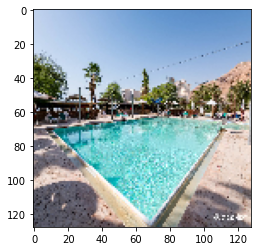

In [159]:
predict_path ="prdiction\stam.jpg"
make_predict(predict_path)   

At the moment the model knows how to differentiate between a dog and a cat, but any other image it will also try to predict it, we will leave that for later

# Deploy to IBM watson 

In [3]:
api_key =API_KEY
location = 'eu-gb'

wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

In [4]:
from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)

In [ ]:
client.spaces.list(limit=10)

In [13]:
space_id = '2fb95d56-5e02-4efd-a9ba-44d5496071f8'
client.set.default_space(space_id)

'SUCCESS'

In [19]:
software_spec_uid = client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [ ]:
client.wml_credentials

In [40]:
model_path =os.path.join('CatsandDog\model')

In [42]:
metadata = {
            client.repository.ModelMetaNames.NAME: 'Cats and Dog',
            client.repository.ModelMetaNames.TYPE: 'tensorflow_2.7',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

published_model = client.repository.store_model(
    model=model_path,
    meta_props=metadata)

In [ ]:
import json

published_model_uid = client.repository.get_model_id(published_model)
model_details = client.repository.get_details(published_model_uid)
print(json.dumps(model_details, indent=2))

In [ ]:
models_details = client.repository.list_models()

In [ ]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of Cats and dog",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create(published_model_uid, meta_props=metadata)

In [ ]:
deployment_uid = client.deployments.get_uid(created_deployment)
scoring_endpoint = client.deployments.get_scoring_href(created_deployment)
print(scoring_endpoint)

In [ ]:
client.deployments.get_details(deployment_uid)

In [17]:
#scoring with our deployd model

score = tf.keras.utils.load_img(os.path.join('.\prdiction\dog1.jpg') , target_size=(128,128))
input_arr = tf.keras.utils.img_to_array(score)
input_arr = np.array(input_arr)

input_arr

array([[[ 93., 117.,  69.],
        [145., 156., 113.],
        [119., 140.,  84.],
        ...,
        [123., 161., 122.],
        [ 97., 150.,  96.],
        [135., 184.,  93.]],

       [[105., 122.,  80.],
        [139., 143., 110.],
        [118., 132.,  83.],
        ...,
        [122., 153., 121.],
        [ 92., 140.,  92.],
        [122., 168.,  96.]],

       [[102., 129.,  62.],
        [129., 142.,  89.],
        [123., 145.,  83.],
        ...,
        [130., 141., 111.],
        [102., 124.,  77.],
        [132., 149.,  97.]],

       ...,

       [[104., 140.,  53.],
        [182., 188., 150.],
        [228., 228., 190.],
        ...,
        [116., 120.,  87.],
        [127., 135., 112.],
        [ 50.,  90.,  28.]],

       [[191., 223., 160.],
        [155., 183.,  73.],
        [183., 219., 109.],
        ...,
        [161., 155., 155.],
        [167., 158., 163.],
        [ 74., 120.,  58.]],

       [[218., 239., 160.],
        [208., 219., 176.],
        [194., 2

In [18]:
scoring_payload = {"input_data": [{"values": [input_arr.tolist()]}]}

In [19]:
predictions = client.deployments.score(deployment_uid, scoring_payload)
print(json.dumps(predictions, indent=2))

{
  "predictions": [
    {
      "id": "dense_11",
      "values": [
        [
          0.16814836859703064,
          0.831851601600647
        ]
      ]
    }
  ]
}


we have a deployd model on Watson Studio

the next step is FUll stack it into a web app